----------------------------------------------------------------------------
# **Question 8:  PLANT-DAMAGE STUDY (6 points)**
----------------------------------------------------------------------------

## Description

You have been hired as a data analyst by a tree nursery. One of the projects you have been put on aims to investigate the vulnerability of the plants to potential calamities. For example, you need to find the probability of the plants being damaged if there is a regional drought of a certain degree or if there is a pipe breakage in the supply system. 

Fortunately, you have been provided data from which you can derive the desired probabilities. The data is stored in a csv file called _tree_nursery.csv_. Its first column contains possible events that can happen in a given year. You can assume that these events are _mutually exclusive_ (or disjoint) and _collectively exhaustive_ (i.e., no other events can occur). The second column is based on historical data. It provides the number of years that each of the events had occured over the last 30 years. Finally, the third column is constructed for you by highly experienced arborists and stores the probability that each of the events leads to damage. 

Import numpy and pandas libraries, no additional libraries are allowed. Load the data and use it to answer each of the questions below. For each computational question you need to either print your answer or give precise instructions where the answer is located. You need to provide a complete and well-documented code (i.e., your results need to be reproducible and the code needs to be accompanied by explanatory notes) in order to receive full credit for this problem.

## Questions

a. (2 points) What is the probability of occurance of each of the events based on the historical data?

b. (2 points) What is the total probability of plants being damaged in a given year?

c. (1 point) What theorem/property did you use to answer question b? Did you use any assumptions for this theorem/property? 
Note: to answer the first part of this question you can simply state the name of the theorem/property.

d. (1 point) Which of the following actions should be prioritized by the tree nursery? Justify your answer.
1. Improving the maintenance of the pipes in the supply system.
2. Further automating the operation to prevent human errors.
3. Improving safety protocols to prevent fire.


## **Your code**

### Preliminaries

In [ ]:
# Import the packages
import pandas as pd  
import numpy as np 

### Part a

In [1]:
# Load the dataset and perform the analysis
data = pd.read_csv('tree_nursery.csv')
print(data.shape)
print(data.head(11))

# Copy the dataset to avoid any changes to the original data
df = data.copy()

(11, 3)
                        Event  Years occured  Damage probability
0   Regional drought degree 1              1                0.20
1   Regional drought degree 2              1                0.45
2   Regional drought degree 3              0                0.65
3   Regional drought degree 4              0                0.75
4               Pipe breakage              3                0.55
5                 Human error              1                0.90
6                   Pollution              1                0.70
7                      Plague              2                0.80
8               Fire degree 1              1                0.80
9               Fire degree 2              0                0.95
10                  No events             20                0.00


### Part b
We are going to create a new column that will store the desired occurance probabilities. The column will be named _Event probability_. To compute its entries we will divide the entries in column _Years occured_ by the total number of years, which can be found as the sum over all entries in _Years occured_.  

In [2]:
# Create a new column that contains the probabilities of each event based on the historical data
df['Event probability'] = df['Years occured']/sum(df['Years occured'])
df.head(11)

,Event,Years occured,Damage probability,Event probability
0,Regional drought degree 1,1,0.20,0.033333
1,Regional drought degree 2,1,0.45,0.033333
2,Regional drought degree 3,0,0.65,0.000000
3,Regional drought degree 4,0,0.75,0.000000
4,Pipe breakage,3,0.55,0.100000
5,Human error,1,0.90,0.033333
6,Pollution,1,0.70,0.033333
7,Plague,2,0.80,0.066667
8,Fire degree 1,1,0.80,0.033333
9,Fire degree 2,0,0.95,0.000000


The answer to question a can be found in column _Event probability_.

### Part c
We are going to create a new column that will store the joint probability of an event happening and the plants beign damaged. To compute these joint probabilities we will multiply columns _Event probability_ and _Damage probability_ entrywise. The total probability of plants being damaged in a given year is simply the sum of these joint probabilities.

In [3]:
# Create a new column that will store the joint probabilities
df['Joint probability'] = df['Event probability']*df['Damage probability']
print(df.head(11))

# Find the sum of the joint probabilities
total_damage_prob = sum(df['Joint probability'])
print(f"The total probability of plants being damaged in a given year is {total_damage_prob:.4f}.")

                        Event  Years occured  Damage probability  \
0   Regional drought degree 1              1                0.20   
1   Regional drought degree 2              1                0.45   
2   Regional drought degree 3              0                0.65   
3   Regional drought degree 4              0                0.75   
4               Pipe breakage              3                0.55   
5                 Human error              1                0.90   
6                   Pollution              1                0.70   
7                      Plague              2                0.80   
8               Fire degree 1              1                0.80   
9               Fire degree 2              0                0.95   
10                  No events             20                0.00   

    Event probability  Joint probability  
0            0.033333           0.006667  
1            0.033333           0.015000  
2            0.000000           0.000000  
3          

### Part d

We used the law of total probability under the assumptions that the calamity events are mutually exclusive and form the complete sample space.

### Part e
Since the highest value in the joint probability column corresponds to pipe breakage, action 1 should be prioritized.

-------------------------------------------------------------------------------
# **Question 9: SUM OF TWO DICE ROLLS (6 points)**
-------------------------------------------------------------------------------
## Description

Consider two fair six-sided dice. The sum of their rolls can be any integer between 2 and 12. 

## Questions

a. (3 points) What is the probability mass function (PMF) of the sum of the two dice rolls? Complete the code provided to you.

b. (1 point) Visualize the PMF of the sum.

c. (1 point) What is the expected value of the sum?

d. (1 point) What is the standard deviation of the sum?

## **Your code**

### Part a

We are going to compute the PMF of the sum of the two dice rolls using a dictionary. The values of the sum will be the keys and the corresponding probabilities will be the values.

In [4]:
# Initialize a dictionary to store the values of the sum and the corresponding probabilities
pmf = {}

# Iterate over all possible outcomes of two rolls 
for die1 in range(1, 7):
    for die2 in range(1, 7):
        # Compute the sum of the two dice
        dice_sum = die1 + die2
            
        # Compute the corresponding probability 
        p_roll = (1/6)**2

        # Update the probability for this sum in the dictionary
        if dice_sum in pmf: 
            pmf[dice_sum] = pmf[dice_sum] + p_roll
        else:
            pmf[dice_sum] =  p_roll

### Part b

We will visualize the PMF using pyplot from matplotlib. The sums and the probabilities that are stored in the pmf dictionary will be transferred into numpy arrays.

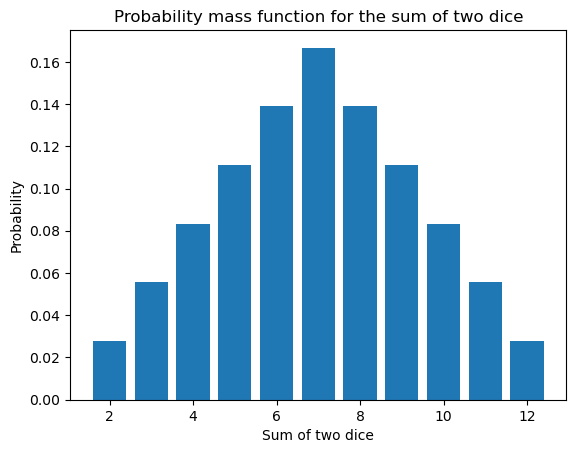

In [5]:
# Import the library
import matplotlib.pyplot as plt

# Create numpy arrays for the sums and their probabilities
sums = np.array(list(pmf.keys()))
p_sums = np.array(list(pmf.values()))

# Create a bar chart
plt.bar(sums, p_sums)
plt.title('Probability mass function for the sum of two dice rolls')
plt.xlabel('Sum of two dice rolls')
plt.ylabel('Probability')
plt.show()

### Part c

The expected value is simply the weighted sum of all sum values and can be computed using a dot product.

In [6]:
# Compute the expected value 
expectation = np.dot(sums, p_sums)

print(f"The expected value of the sum of two dice rolls {expectation:.4f}.")

The expected value of the sum of two dice rolls 7.0000.


### Part d

First, we are going to find the variance using the dot product. The square root of the variance will give us the standard deviation.

In [7]:
# Compute the variance
squared_difference = np.square(sums-expectation)
variance = np.dot(squared_difference, p_sums)

# Compute the standard deviation
std_deviation = variance**0.5

print(f"The standard deviation of the sum of two dice rolls {std_deviation:.4f}.")  

The standard deviation of the sum of two dice rolls 2.4152.
